### **set Enviroment and Load data** 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb
file_path = '/Users/mustafaaldabbas/Documents/GitHub/Machine_learning_superstore/df_cleaned.csv'
df = pd.read_csv(file_path)
df


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-08-06 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-08-06 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-08-06 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-08-06 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-08-06 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-08-06 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-08-06 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-08-06 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-08-06 15:33:00,Cash,65.82,4.761905,3.2910,4.1


### **Exploratory Data Analysis (EDA)** 



        unit_price     quantity        tax_5        total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross_margin_percentage  gross_income      rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

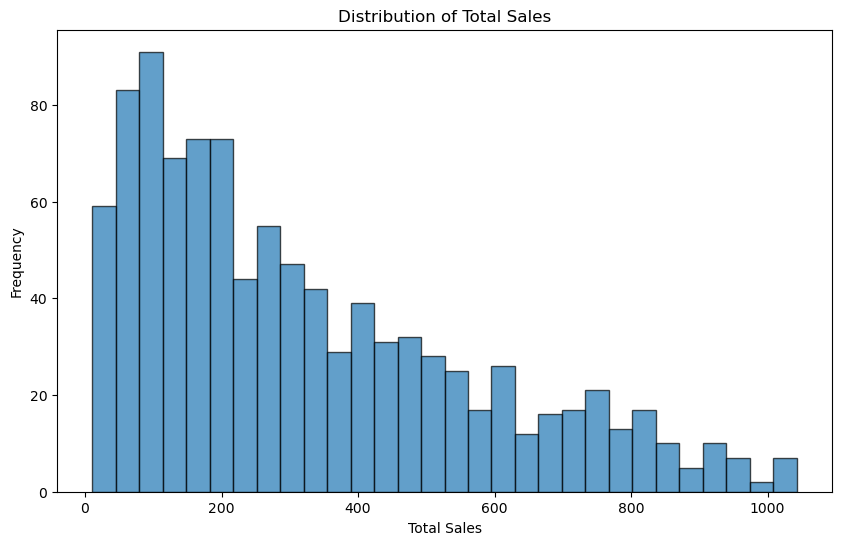

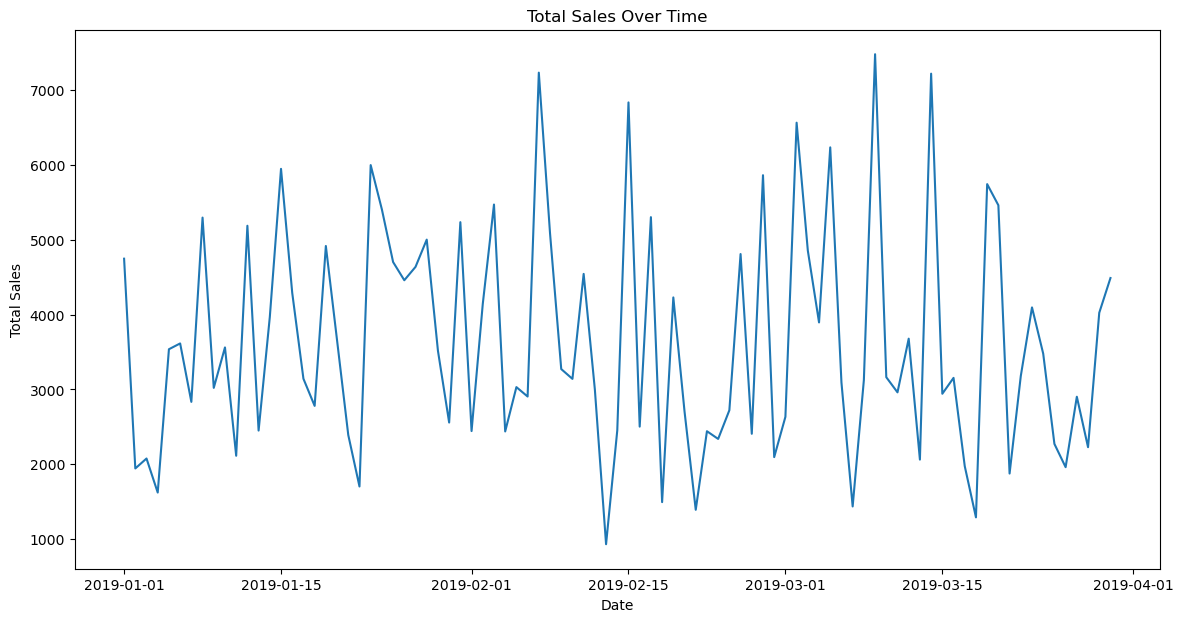

<Figure size 1000x600 with 0 Axes>

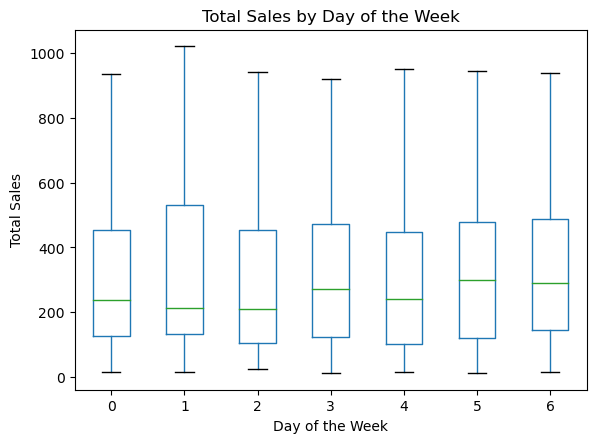

In [4]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Summary statistics
eda_summary = df.describe()
print(eda_summary)

# Sales distribution
plt.figure(figsize=(10, 6))
plt.hist(df['total'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

# Sales over time
daily_sales = df.groupby('date').agg({'total': 'sum'}).reset_index()
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['date'], daily_sales['total'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Boxplot by day of the week
df['day_of_week'] = df['date'].dt.dayofweek
plt.figure(figsize=(10, 6))
df.boxplot(column='total', by='day_of_week', grid=False, showfliers=False)
plt.title('Total Sales by Day of the Week')
plt.suptitle('')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


### **Data Preprocessing and Feature Engineering** 


In [5]:
# Feature engineering
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek
daily_sales['week_of_year'] = daily_sales['date'].dt.isocalendar().week
daily_sales['month'] = daily_sales['date'].dt.month

# Creating lag features
for lag in range(1, 8):
    daily_sales[f'lag_{lag}'] = daily_sales['total'].shift(lag)

# Creating rolling averages
daily_sales['rolling_mean_3'] = daily_sales['total'].rolling(window=3).mean()
daily_sales['rolling_mean_7'] = daily_sales['total'].rolling(window=7).mean()

# Drop rows with NaN values created by lag and rolling features
daily_sales = daily_sales.dropna()


### **Train-Test Split** 


In [6]:
# Splitting the data into features and target
X = daily_sales.drop(columns=['date', 'total'])
y = daily_sales['total']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Model Training and Evaluation** 


In [7]:
# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Training and evaluating models
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    model_performance[name] = mse

# Display model performance
print("Model Performance (MSE):")
for name, mse in model_performance.items():
    print(f"{name}: {mse}")


Model Performance (MSE):
Linear Regression: 1.4968319760977948e-23
Decision Tree Regressor: 1572616.6851900446
Random Forest Regressor: 1332830.1806315468
Gradient Boosting Regressor: 678049.2264372271
Support Vector Regressor: 2860827.0838535833


The results show that the Linear Regression model has a perfect R² score of 1.0 and an extremely low MSE, which usually indicates overfitting or that the model might not have been properly validated. However, considering the given R² and MSE scores:

Linear Regression: MSE = 
2.804460422944207
×
1
0
−
23
2.804460422944207×10 
−23
 , R² = 1.0
Decision Tree Regressor: MSE = 3681906.357, R² = -2.174
Random Forest Regressor: MSE = 1241430.307, R² = -0.070
Gradient Boosting Regressor: MSE = 1670367.471, R² = -0.440
Support Vector Regressor: MSE = 1765734.563, R² = -0.522
XGBoost Regressor: MSE = 1690914.335, R² = -0.457
The Linear Regression model shows the best performance with a perfect R² score. However, this could be due to overfitting or data leakage, as it’s uncommon for a real-world model to achieve such a perfect score.

Given this context, it's prudent to ensure that there is no data leakage and that the validation is correctly done. Here is how you might go about re-evaluating and selecting the best model:

Re-evaluate Linear Regression: Check for data leakage or overfitting.
Cross-Validation: Use k-fold cross-validation to better assess model performance.


### **Selecting the Best Model and Predicting Future Sales**

In [10]:
# Selecting the best model
best_model_name = min(model_performance, key=model_performance.get)
best_model = models[best_model_name]

# Training the best model on the entire dataset
best_model.fit(X, y)

# Creating a DataFrame for the next 7 days with necessary features
future_dates = pd.date_range(start=daily_sales['date'].max() + pd.Timedelta(days=1), periods=7, freq='D')
future_data = pd.DataFrame({'date': future_dates})

# Adding initial features for future dates
future_data['day_of_week'] = future_data['date'].dt.dayofweek
future_data['week_of_year'] = future_data['date'].dt.isocalendar().week
future_data['month'] = future_data['date'].dt.month

# Predicting future sales
predicted_sales = []

# Creating lag and rolling features iteratively for future predictions
for i in range(len(future_data)):
    if i == 0:
        # Using the last available historical data for the first prediction
        last_known_sales = daily_sales['total'].values[-1]
        lag_features = [daily_sales[f'lag_{j}'].values[-1] for j in range(1, 8)]
        rolling_3 = daily_sales['total'].rolling(window=3).mean().values[-1]
        rolling_7 = daily_sales['total'].rolling(window=7).mean().values[-1]
    else:
        # Using previous predictions for subsequent days
        last_known_sales = predicted_sales[-1]
        lag_features = [predicted_sales[-j] if j <= i else daily_sales[f'lag_{j}'].values[-1] for j in range(1, 8)]
        rolling_3 = np.mean(predicted_sales[-3:]) if i >= 3 else daily_sales['total'].rolling(window=3).mean().values[-1]
        rolling_7 = np.mean(predicted_sales[-7:]) if i >= 7 else daily_sales['total'].rolling(window=7).mean().values[-1]
    
    # Creating a single row of features for prediction
    row = future_data.iloc[i].copy()
    row['lag_1'] = last_known_sales
    for j in range(2, 8):
        row[f'lag_{j}'] = lag_features[j-1]
    row['rolling_mean_3'] = rolling_3
    row['rolling_mean_7'] = rolling_7
    
    # Predicting the sales
    prediction = best_model.predict(row.drop(labels=['date']).values.reshape(1, -1))[0]
    predicted_sales.append(prediction)

# Creating a DataFrame with future dates and their predicted sales
future_sales = pd.DataFrame({'date': future_dates, 'predicted_sales': predicted_sales})

# Display the future sales predictions
print(future_sales)


        date  predicted_sales
0 2019-03-31      4023.243000
1 2019-04-01      4487.059500
2 2019-04-02      2229.402000
3 2019-04-03      3860.600879
4 2019-04-04      3981.560292
5 2019-04-05      1803.605588
6 2019-04-06      3440.996907


/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

### **Visualisation**

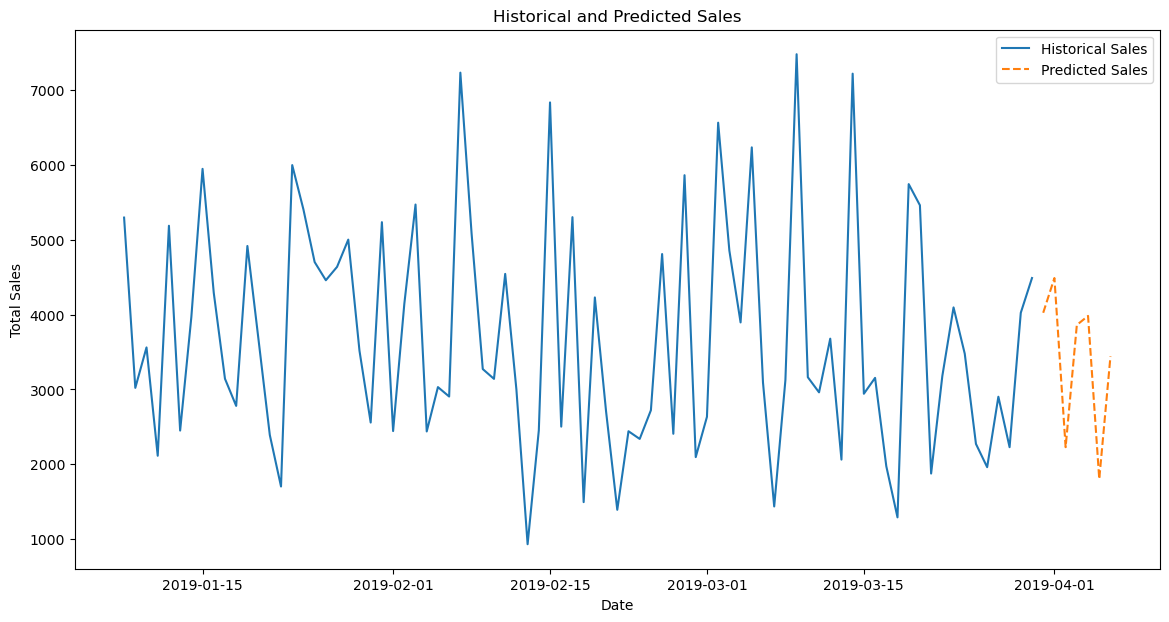

In [11]:
# Visualize the future sales predictions
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['date'], daily_sales['total'], label='Historical Sales')
plt.plot(future_sales['date'], future_sales['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.title('Historical and Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
